In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt

# Checks for available GPUs and lists them
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
  try:
    # Set TensorFlow to use only the first GPU
    tf.config.experimental.set_visible_devices(gpus[0], 'GPU')
    logical_gpus = tf.config.experimental.list_logical_devices('GPU')
    print(len(gpus), "Physical GPU,", len(logical_gpus), "Logical GPU")
  except RuntimeError as e:
    # Visible devices must be set before GPUs have been initialized
    print(e)

2024-03-10 14:49:01.729707: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-10 14:49:01.729779: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-10 14:49:01.730736: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-03-10 14:49:01.735503: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-03-10 14:49:02.482097: W tensorflow/compiler/tf2

1 Physical GPU, 1 Logical GPU


2024-03-10 14:49:03.498619: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-03-10 14:49:03.533343: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-03-10 14:49:03.533388: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-03-10 14:49:03.535585: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-03-10 14:49:03.535637: I external/local_xla/xla/stream_executor

In [2]:
# Load MNIST dataset
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize the data
x_train, x_test = x_train / 255.0, x_test / 255.0


In [3]:
# Reshape the data to include a channel dimension
x_train = x_train.reshape((x_train.shape[0], 28, 28, 1))
x_test = x_test.reshape((x_test.shape[0], 28, 28, 1))


In [4]:
#Get dimentions of data
_, a, b, c = x_train.shape

In [5]:
# Convert the data to a TensorFlow dataset
train_dataset = tf.data.Dataset.from_tensor_slices((x_train, y_train))

# Define a function for data augmentation
def augment(image, label):
    image = tf.image.random_flip_left_right(image)
    image = tf.image.random_contrast(image, lower=0.8, upper=1.2)
    return image, label

# Apply data augmentation to the training dataset
train_dataset = train_dataset.map(augment)


2024-03-10 14:49:04.237132: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 376320000 exceeds 10% of free system memory.
2024-03-10 14:49:06.042958: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 376320000 exceeds 10% of free system memory.


In [6]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(a,b,c)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


Epoch 1/25


2024-03-10 14:49:11.668377: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 376320000 exceeds 10% of free system memory.
2024-03-10 14:49:13.606766: I external/local_xla/xla/service/service.cc:168] XLA service 0x9d8b8a0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2024-03-10 14:49:13.606802: I external/local_xla/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce GTX 1650, Compute Capability 7.5
2024-03-10 14:49:13.625409: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-03-10 14:49:13.663724: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:454] Loaded cuDNN version 8904
I0000 00:00:1710074953.757364   66435 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


1875/1875 [==============================] - 12s 5ms/step - loss: 0.4451 - accuracy: 0.8661
Epoch 2/25
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2486 - accuracy: 0.9255
Epoch 3/25
1875/1875 [==============================] - 11s 6ms/step - loss: 0.2024 - accuracy: 0.9386
Epoch 4/25
1875/1875 [==============================] - 11s 6ms/step - loss: 0.1748 - accuracy: 0.9469
Epoch 5/25
1875/1875 [==============================] - 11s 6ms/step - loss: 0.1572 - accuracy: 0.9516
Epoch 6/25
1875/1875 [==============================] - 11s 6ms/step - loss: 0.1460 - accuracy: 0.9549
Epoch 7/25
1875/1875 [==============================] - 10s 6ms/step - loss: 0.1388 - accuracy: 0.9571
Epoch 8/25
1875/1875 [==============================] - 10s 6ms/step - loss: 0.1316 - accuracy: 0.9587
Epoch 9/25
1875/1875 [==============================] - 10s 6ms/step - loss: 0.1244 - accuracy: 0.9612
Epoch 10/25
1875/1875 [==============================] - 10s 6ms/step - loss: 0.1190

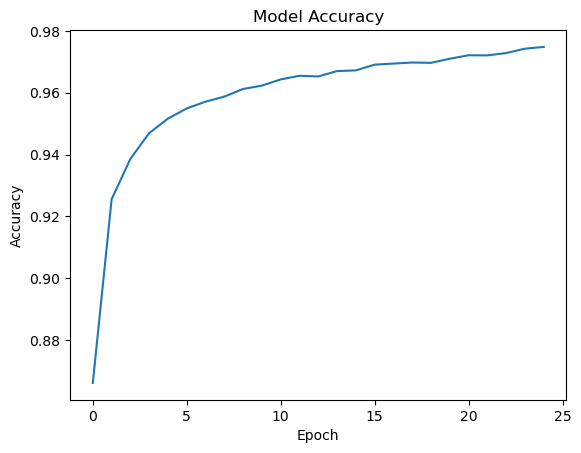

  1/313 [..............................] - ETA: 37s - loss: 0.0168 - accuracy: 1.0000

2024-03-10 14:53:36.523587: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 31360000 exceeds 10% of free system memory.
2024-03-10 14:53:36.588080: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 31360000 exceeds 10% of free system memory.


313/313 [==============================] - 1s 3ms/step - loss: 0.1157 - accuracy: 0.9684


[0.1156969964504242, 0.9684000015258789]

In [7]:
# Lists to store accuracy values for plotting
history = model.fit(train_dataset.batch(32), epochs=25)

# Plot accuracy per epoch
plt.plot(history.history['accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show()

# Evaluate the model on the test data
model.evaluate(x_test, y_test)
